# 1. Apply a multiple linear regression on the given dataset

## Variable list
- M: percentage of males aged 14-24
- So: whether it is in a Southern state. 1 for Yes, 0 for No.
- Ed: mean years of schooling
- Po1: police expenditure in 1960
- Po2: police expenditure in 1959
- LF: labour force participation rate
- M.F: number of males per 1000 females
- Pop: state population
- NW: number of non-whites resident per 1000 people
- U1: unemployment rate of urban males aged 14-24
- U2: unemployment rate of urban males aged 35-39
- GDP: gross domestic product per head
- Ineq: income inequality
- Prob: probability of imprisonment
- Time: average time served in prisons
- y: crime rate in an unspecified unit region (target)

In [1]:
# packages and data import
# DO NOT CHANGE THIS PART
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import t, f, chi2, skew, kurtosis
%matplotlib inline
data=pd.read_csv('https://drive.google.com/uc?export=download&id=1ssBNxmds4zmmJbAHzJUB0_UyyfyMtoHT')

(1) Find the top 5 input variables that show the high linear correlation with the target based on the correlation coefficient. 

In [2]:
cor_targ = abs(data.corr())['y']
cor_targ.sort_values(ascending = False).head(6)

y       1.000000
Po1     0.687604
Po2     0.666714
GDP     0.441320
Prob    0.427422
Pop     0.337474
Name: y, dtype: float64

(2) Draw pairwise scatter plot – one scatter plot illustrates the relationship between the input variable selected in Question (1) and output target 

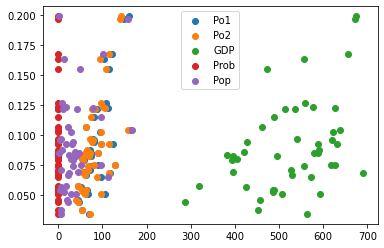

In [3]:
plt.scatter(data['Po1'],data['y'],label = 'Po1')
plt.scatter(data['Po2'],data['y'],label = 'Po2')
plt.scatter(data['GDP'],data['y'],label = 'GDP')
plt.scatter(data['Prob'],data['y'],label = 'Prob')
plt.scatter(data['Pop'],data['y'],label = 'Pop')
plt.legend()
plt.show()

(3) Train a linear regression model (M1) using the selected variables in Question (1) and fill the following table. 

In [4]:
M1 = LinearRegression()
M1.fit(data[['Po1','Po2','GDP','Prob', 'Pop']],data['y'])

X = data[['Po1','Po2','GDP','Prob', 'Pop']].values
n,p = X.shape
X = np.c_[np.ones(n).T,X]

XtX = np.matmul(X.T,X)
inv_XtX = np.linalg.inv(XtX)
beta = np.matmul(np.matmul(inv_XtX,X.T),data[['y']].values)
print("Coefficient: ", beta.flatten())

y_true = data['y'].values
y_pred = np.matmul(X,beta).flatten()

#another method for predicting y_pred --> Same result!
#y_pred = M1.predict(data[['Po1','Po2','GDP','Prob', 'Pop']]) 

SSE = np.sum((y_true - y_pred)**2)
MSE = SSE/(n-p-1)

list_name = ['Intercept','Po1','Po2','GDP','Prob', 'Pop']
for i in range(len(list_name)):
    se_b = np.sqrt(MSE * inv_XtX[i][i])
    t_value = beta[i] / se_b
    p_value = (1 - t.cdf(np.abs(t_value),n-p-1))*2
    print("=======",list_name[i],"=======")
    print("se_b", se_b)
    print("t: ",t_value)
    print("P-value: ",p_value)




Coefficient:  [ 9.22875679e-02  2.62474439e-03 -1.49015707e-03 -1.53743853e-04
 -4.13347529e-01 -1.38774123e-04]
======= Intercept =======
se_b 0.034897558136749135
t:  [2.64452795]
P-value:  [0.01154115]
======= Po1 =======
se_b 0.0012125406888231069
t:  [2.164665]
P-value:  [0.03628787]
======= Po2 =======
se_b 0.001293779903866379
t:  [-1.1517856]
P-value:  [0.2560814]
======= GDP =======
se_b 7.527988637364756e-05
t:  [-2.04229655]
P-value:  [0.04758909]
======= Prob =======
se_b 0.21832966635414022
t:  [-1.89322659]
P-value:  [0.06540028]
======= Pop =======
se_b 0.0001300765294277144
t:  [-1.0668652]
P-value:  [0.29227476]


(4) Calculate VIF for the variables of M1. Given that multicollinearity is severe when there is a variable with a VIF value of greater than 10, find the most reasonable way to get a better model based on the calculated VIF values.  

In [5]:
reg = LinearRegression()
vif = list()
reg.fit(data[['Po2','GDP','Prob', 'Pop']],data['Po1'])
r2_po1 = reg.score(data[['Po2','GDP','Prob', 'Pop']],data['Po1'])
vif.append(1/(1-r2_po1))

reg.fit(data[['Po1','GDP','Prob', 'Pop']],data['Po2'])
r2_po2 = reg.score(data[['Po1','GDP','Prob', 'Pop']],data['Po2'])
vif.append(1/(1-r2_po2))

reg.fit(data[['Po1','Po2','Prob', 'Pop']],data['GDP'])
r2_gdp = reg.score(data[['Po1','Po2','Prob', 'Pop']],data['GDP'])
vif.append(1/(1-r2_gdp))

reg.fit(data[['Po1','Po2','GDP','Pop']],data['Prob'])
r2_prob = reg.score(data[['Po1','Po2','GDP','Pop']],data['Prob'])
vif.append(1/(1-r2_prob))

reg.fit(data[['Po1','Po2','GDP','Prob']],data['Pop'])
r2_pop = reg.score(data[['Po1','Po2','GDP','Prob']],data['Pop'])
vif.append(1/(1-r2_pop))

for i,j in enumerate(vif):
    print(i,": ", j)



0 :  80.34832161088916
1 :  80.97531630356094
2 :  3.2647323097391228
3 :  1.5247804645690082
4 :  1.5174252113126927


(5) Based on the way you provide in Question (1), train a new regression model (M2) and fill the following table. 

In [6]:
M2 = LinearRegression()
M2.fit(data[['Po2','GDP','Prob', 'Pop']],data['y'])

X = data[['Po2','GDP','Prob', 'Pop']].values
n,p = X.shape
X = np.c_[np.ones(n).T,X]

XtX = np.matmul(X.T,X)
inv_XtX = np.linalg.inv(XtX)
beta = np.matmul(np.matmul(inv_XtX,X.T),data[['y']].values)
print("Coefficient: ", beta.flatten())

y_true = data['y'].values
y_pred = np.matmul(X,beta).flatten()

#another method for predicting y_pred --> Same result!
#y_pred = M2.predict(data[['Po2','GDP','Prob', 'Pop']])

SSE = np.sum((y_true - y_pred)**2)
MSE = SSE/(n-p-1)

list_name = ['Intercept','Po2','GDP','Prob', 'Pop']
for i in range(len(list_name)):    

    se_b = np.sqrt(MSE * inv_XtX[i][i])
    t_value = beta[i] / se_b
    p_value = (1 - t.cdf(np.abs(t_value),n-p-1))*2
    print("=======",list_name[i],"=======")
    print("se_b", se_b)
    print("t: ",t_value)
    print("P-value: ",p_value)


    


Coefficient:  [ 9.42623184e-02  1.24986512e-03 -1.53902641e-04 -4.18101167e-01
 -9.52767103e-05]
======= Intercept =======
se_b 0.036384168043554016
t:  [2.59075096]
P-value:  [0.01311175]
======= Po2 =======
se_b 0.00027913319255744773
t:  [4.47766571]
P-value:  [5.68916401e-05]
======= GDP =======
se_b 7.851354734040577e-05
t:  [-1.96020491]
P-value:  [0.05662803]
======= Prob =======
se_b 0.22769664554201263
t:  [-1.83622014]
P-value:  [0.07341032]
======= Pop =======
se_b 0.00013403552012048587
t:  [-0.7108318]
P-value:  [0.48111749]


(7) Apply the F-test on M1 and M2 and explain the results. In addition, fill the following tables

In [9]:
y_pred_M1 = M1.predict(data[['Po1','Po2','GDP','Prob', 'Pop']])
y_pred_M2 = M2.predict(data[['Po2','GDP','Prob', 'Pop']])
y_true = data['y'].values

SST = sum((y_true-np.mean(y_true))**2)
SSE_M1 = sum((y_true-y_pred_M1)**2)
SSR_M1 = sum((y_pred_M1-np.mean(y_true))**2)

SSE_M2 = sum((y_true-y_pred_M2)**2)
SSR_M2 = sum((y_pred_M2-np.mean(y_true))**2)

#print(SST, SSE_M2 + SSR_M2)
print("SST,SSE1,SSR1, SSE2, SSR2: ",SST, SSE_M1, SSR_M1,SSE_M2,SSR_M2)

n_M1, p_M1 = data[['Po1','Po2','GDP','Prob', 'Pop']].shape
p_M2 = p_M1 - 1 #Since input of M2 4 and M1 is 5, degree of freedom is 1 smaller than p_M1
n_M2 = n_M1 # length is same for M! and M2
print(n_M1)
# Also we can do like this, but above code is more efficient.
# n, p_M2 = data[['Po1','Po2','GDP','Prob', 'Pop']].shape

MSE_M1 = SSE_M1/(n_M1 - p_M1 -1)
MSE_M2 = SSE_M2/(n_M2 - p_M2 -1)

MSR_M1 = SSR_M1/p_M1
MSR_M2 = SSR_M2/p_M2

print("MSE1, MSE2, MSR1, MSR2: ", MSE_M1, MSE_M2, MSR_M1, MSR_M2)

f_M1 = MSR_M1/MSE_M1
f_M2 = MSR_M2/MSE_M2

print("F1, F2: ",f_M1, f_M2)

pvalue_M1 = 1-f.cdf(f_M1,p_M1,n_M1-p_M1-1)
pvalue_M2 = 1-f.cdf(f_M2,p_M2,n_M2-p_M2-1)

print("P_v1, P_v2: ", pvalue_M1, pvalue_M2)


SST,SSE1,SSR1, SSE2, SSR2:  0.06880927659574469 0.030480713807041322 0.038328562788702926 0.03396426877649365 0.034845007819250186
47
MSE1, MSE2, MSR1, MSR2:  0.0007434320440741786 0.0008086730661069917 0.007665712557740585 0.008711251954812546
F1, F2:  10.311248511337658 10.772279082756048
P_v1, P_v2:  1.8875302661980342e-06 4.232770240086836e-06


(8) Calculate R^2 and adjusted R^2 for M1 and M2. Then, compare two models. 

In [10]:
r2_M1 = M1.score(data[['Po1','Po2','GDP','Prob', 'Pop']],data['y'])
r2_M2 = M2.score(data[['Po2','GDP','Prob', 'Pop']],data['y'])

print("R2 Score: ", r2_M1, r2_M2)

adj_r2_M1 = 1-((n_M1-1)/(n_M1-p_M1-1))*(1-r2_M1)
adj_r2_M2 = 1-((n_M2-1)/(n_M2-p_M2-1))*(1-r2_M2)

print("adj R2 Score: ", adj_r2_M1, adj_r2_M2)



R2 Score:  0.5570260971334449 0.5063998568676412
adj R2 Score:  0.5030048894667918 0.45939031942646413


(9) Calculate residuals of M1 and draw scatter plots to show relationship between one of the input variables and residuals. 

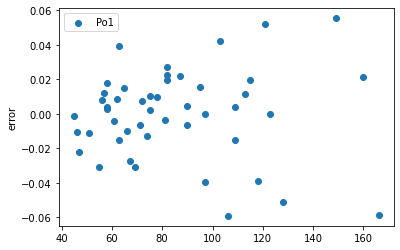

In [11]:
err_M1 = y_true - y_pred_M1

plt.scatter(data[['Po1']],err_M1, label = 'Po1')
#plt.scatter(data[['Po2']],err_M1, label = 'Po2')
#plt.scatter(data[['GDP']],err_M1, label = 'GDP')
#plt.scatter(data[['Prob']],err_M1, label = 'Prob')
#plt.scatter(data[['Pop']],err_M1, label = 'Pop')
plt.legend()
plt.ylabel("error")
plt.show()

(10) Do residuals of M1 and M2 follow the normal distribution based on the Jarque–Bera test? (significance level is 0.05). 

In [12]:
err_M2 = y_true - y_pred_M2


skew_M1 = skew(err_M1)
skew_M2 = skew(err_M2)

kut_M1 = kurtosis(err_M1, fisher = False)
kut_M2 = kurtosis(err_M2, fisher = False)

JBtest_M1 = (n_M1-p_M1)/6*((skew_M1**2)+((kut_M1-3)**2)/4)
JBtest_M2 = (n_M2-p_M2)/6*((skew_M2**2)+((kut_M2-3)**2)/4)

pvalue_JB_M1 = 1-chi2.cdf(JBtest_M1,df=2)
pvalue_JB_M2 = 1-chi2.cdf(JBtest_M2,df=2)
print(pvalue_JB_M1, pvalue_JB_M2)

0.7079936135927738 0.38065144980165666


(11) Do residuals of M1 and M2 satisfy homoskedasticty based on the Breusch–Pagan test? (significance level is 0.05)

In [13]:
M1.fit(data[['Po1','Po2','GDP','Prob','Pop']],err_M1**2)
M2.fit(data[['Po2','GDP','Prob','Pop']],err_M2**2)

e2_pred_M1 = M1.predict(data[['Po1','Po2','GDP','Prob','Pop']])
e2_pred_M2 = M2.predict(data[['Po2','GDP','Prob','Pop']])
err_e2_M1 = err_M1**2-e2_pred_M1 # difference of real error^2 and predict err
err_e2_M2 = err_M2**2-e2_pred_M2

SSE_M1 = sum(err_e2_M1**2)
SSE_M2 = sum(err_e2_M2**2)

SSR_M1 = sum((e2_pred_M1 - np.mean(err_M1**2))**2)
SSR_M2 = sum((e2_pred_M2 - np.mean(err_M2**2))**2)

MSE_M1 = SSE_M1/(n_M1-p_M1-1)
MSE_M2 = SSE_M2/(n_M2-p_M2-1)

MSR_M1 = SSR_M1/p_M1
MSR_M2 = SSR_M2/p_M2

Ftest_M1 = MSR_M1/MSE_M1
Ftest_M2 = MSR_M2/MSE_M2

1-f.cdf(Ftest_M1,p_M1,n_M1-p_M1-1)
1-f.cdf(Ftest_M2,p_M2,n_M2-p_M2-1)

r2_M1 = M1.score(data[['Po1','Po2','GDP','Prob','Pop']],err_M1**2)
r2_M2 = M2.score(data[['Po2','GDP','Prob','Pop']],err_M2**2)

LM_M1 = n_M1 * r2_M1
LM_M2 = n_M2 * r2_M2

print(1-chi2.cdf(LM_M1,p_M1))
print(1-chi2.cdf(LM_M2,p_M2))


0.00028991282719703637
0.00014676678216707373


# 2. Logistic regression

Using the MAGIC Gamma Telescope data set, build a classifier through logistic regression.

The included variabes in this dataset are as follows. 
1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 
11. class: g,h # gamma (signal), hadron (background)
    - g is treated as class 1 while h is treated as class 0

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

# data load
magic=pd.read_csv('https://drive.google.com/uc?export=download&id=1AoCh22pmLHhdQtYdYUAJJqOCwF9obgVO', sep='\t')

X=magic[magic.columns[:-1]].values
y=magic['class'].values

# data partition
trnX,valX,trnY,valY=train_test_split(X,y,test_size=0.2,random_state=10, stratify=y)
# train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(1) Using MAGIC Gamma Telescope data set, calculate accuracy with varying cutoff for the final decision. cutoff ∈{0.1,0.15,0.2,0.25,…,0.95}. Draw a line plot (x=cutoff, y=accuracy). For this problem, the model is trained using trnX and accuracy is calculated using valX.

Text(0, 0.5, 'accuracy')

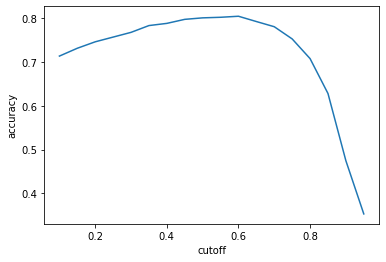

In [15]:
#print(magic)
#print(X)
#print(y)

clf = LogisticRegression(max_iter=300)
clf.fit(trnX,trnY)

y_pred = clf.predict(valX)
y_prob = clf.predict_proba(valX)[:,0]

cutoff = np.arange(0.1,1,0.05)
accuracy = []

for i in cutoff:
    pred_cutoff=['g' if j > i else 'h' for j in y_prob]
    correct = 0
    for k,value in enumerate(pred_cutoff):
        if(value == valY[k]):
            correct += 1
    accuracy.append(correct/len(pred_cutoff))
    
plt.plot(cutoff,accuracy)
plt.xlabel("cutoff")
plt.ylabel("accuracy")